<a href="https://colab.research.google.com/github/binthafra/HAR/blob/main/Copy_of_2nd_LSTM_for_Predict_Intensity(classfier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Installation 

In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2


In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 5.0 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tabgan 1.2.0 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
pip install tabgan

In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 5.3 MB/s 


In [ ]:
pip install scikit-learn==0.23.2

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.2 which is incompatible.


# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE


#### import Keras Tuner 


In [ ]:
import keras_tuner as kt
from tensorflow import keras

In [ ]:
from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### import GAN

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


# Load Dataset

In [ ]:
df = pd.read_csv("Final_Thesis_data.csv")
df.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
df = df.drop('Hr', axis=1)  
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
df = pd.read_csv("merged(old+generated)_sorted.csv")
df.head()

# See Data Description

In [ ]:
df.describe()

,Acc_X,Acc_Y,Acc_Z,Class
count,25957.000000,25957.000000,25957.000000,25957.000000
mean,-0.510749,-6.345121,2.923308,10.366028
std,3.285892,4.878662,3.871105,6.050047
min,-19.609110,-19.608511,-19.608511,1.000000
25%,-1.916800,-9.799809,0.351666,5.000000
50%,0.041079,-9.328170,1.650591,10.000000
75%,1.472404,-2.163065,7.428518,16.000000
max,19.607914,19.608511,18.631678,20.000000


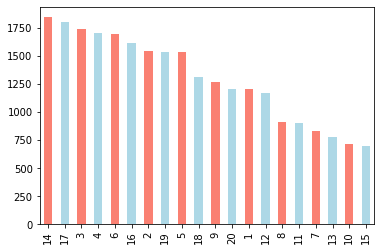

In [ ]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

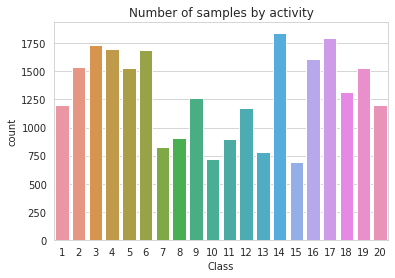

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = 'Class', data = df)
plt.title("Number of samples by activity")
plt.show()

In [ ]:
df = df.drop('Hr', axis=1)  
df

In [ ]:
df.shape

(25957, 4)

In [ ]:
df["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
df.isnull().sum()

Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64

In [ ]:
# Let's find out how many of each class there
df["Class"].value_counts(ascending= True)

15     691
10     716
13     779
7      827
11     900
8      911
12    1170
1     1200
20    1201
9     1264
18    1314
5     1532
19    1533
2     1541
16    1611
6     1690
4     1699
3     1737
17    1796
14    1845
Name: Class, dtype: int64

In [ ]:
#printing data properties
print(df.head(5))
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)
#checking null value
print("DF ISNULL: ",df.isnull().sum())

      Acc_X     Acc_Y     Acc_Z  Class
0  2.660984 -9.653030  0.470237      1
1  2.223091  2.223091  2.223091      1
2  2.098372 -9.481953  0.926070      1
3  2.716461 -9.739352  0.912008      1
4  2.288388 -9.371498  0.910390      1
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Class      int64
dtype: object
DF SHAPE:  (25957, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64


In [ ]:
#dropping target column
X = df.drop('Class', axis=1)  
#taking target column
y = df['Class']
#df.head

In [ ]:
#defining new dataframe
B = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
C = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
D = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])

In [ ]:
#separating target column
X = df.drop('Class', axis=1)  
y = df['Class']

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
#summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 1845, 2: 1845, 3: 1845, 4: 1845, 5: 1845, 6: 1845, 7: 1845, 8: 1845, 9: 1845, 10: 1845, 11: 1845, 12: 1845, 13: 1845, 14: 1845, 15: 1845, 16: 1845, 17: 1845, 18: 1845, 19: 1845, 20: 1845})


In [ ]:
X,y

(          Acc_X     Acc_Y     Acc_Z
 0      2.660984 -9.653030  0.470237
 1      2.223091  2.223091  2.223091
 2      2.098372 -9.481953  0.926070
 3      2.716461 -9.739352  0.912008
 4      2.288388 -9.371498  0.910390
 ...         ...       ...       ...
 36895 -9.132683  5.368997 -1.580772
 36896 -0.934580 -5.950443 -2.271675
 36897  8.840037  2.255845  1.789380
 36898  6.766730  2.162657 -4.627592
 36899 -0.717026 -9.415906  1.523002
 
 [36900 rows x 3 columns], 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 36895    20
 36896    20
 36897    20
 36898    20
 36899    20
 Name: Class, Length: 36900, dtype: int64)

In [ ]:
df = X.join(y)

In [ ]:
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
36895,-9.132683,5.368997,-1.580772,20
36896,-0.934580,-5.950443,-2.271675,20
36897,8.840037,2.255845,1.789380,20
36898,6.766730,2.162657,-4.627592,20


# Apply GAN

In [ ]:
#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20765, 3) (5192, 3) (20765,) (5192,)


In [ ]:
type(X_train)
type(y_train)

pandas.core.series.Series

In [ ]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_test)

In [ ]:
trainxy_df = pd.concat([X_train,y_train],axis=1, join='inner')
trainxy_df

,Acc_X,Acc_Y,Acc_Z,Class
14164,1.223521,-9.291454,2.040754,12
35400,-6.179007,-1.044773,7.606632,17
3445,1.177111,-10.478336,0.659115,3
24617,-5.007473,-6.680421,4.993706,19
11804,0.390514,-8.811991,3.316971,9
...,...,...,...,...
16165,-0.951745,-3.226781,9.273444,14
12185,0.160110,-4.913153,3.833690,9
33309,-0.846456,-1.515041,9.730318,13
18714,-6.008568,2.343879,7.447986,16


In [ ]:
trainxy_df.sort_values(by="Class")
trainxy_df =trainxy_df.to_csv("trainxy_df.csv")

apply gan after butter worth

In [ ]:
new_X, new_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.001, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 100,}).generate_data_pipe(X_train, y_train,
                                                                          X_val, deep_copy=True, only_adversarial=False, use_adversarial=True)
           

Fitting CTGAN transformers for each column:   0%|          | 0/4 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print(new_X.shape)
print(new_y.shape)

(52079, 3)
(52079,)


In [ ]:
new_X

,Acc_X,Acc_Y,Acc_Z
0,6.882820,-9.351580,6.531399
1,7.315114,-10.456100,8.836971
2,3.341642,-11.768070,7.544016
3,3.328326,-9.392217,5.574783
4,6.764766,-10.590713,6.987847
...,...,...,...
52074,7.983368,-11.213248,-2.033227
52075,8.176618,-11.767091,-2.722616
52076,7.710722,-10.549366,-3.377183
52077,7.698517,-9.994572,-0.479845


In [ ]:
new_y

0        16
1        11
2        15
3         1
4         9
         ..
52074     4
52075    18
52076    16
52077    15
52078    15
Name: Class, Length: 52079, dtype: int64

In [ ]:
type(new_X)
type(new_y)

pandas.core.series.Series

In [ ]:
new_y.unique()

array([16, 11, 15,  1,  9,  3, 13,  8,  5, 17, 14,  2, 19,  7,  0,  4, 18,
       21, 12,  6, 22, 10, 20, -1])

In [ ]:
new_X.to_csv("Generate_new_X.csv")
new_y.to_csv("Generate_new_y.csv")

In [ ]:
generated_df = pd.concat([new_X,new_y],axis=1, join='inner')
generated_df

,Acc_X,Acc_Y,Acc_Z,Class
0,6.882820,-9.351580,6.531399,16
1,7.315114,-10.456100,8.836971,11
2,3.341642,-11.768070,7.544016,15
3,3.328326,-9.392217,5.574783,1
4,6.764766,-10.590713,6.987847,9
...,...,...,...,...
52074,7.983368,-11.213248,-2.033227,4
52075,8.176618,-11.767091,-2.722616,18
52076,7.710722,-10.549366,-3.377183,16
52077,7.698517,-9.994572,-0.479845,15


In [ ]:
generated_df = generated_df.drop("Unnamed: 0", axis=1)
generated_df

In [ ]:


new_X = pd.read_csv("Generate_new_X.csv")
new_y =pd.read_csv("Generate_new_y.csv")




gan_csv =generated_df.to_csv("Generate_new_df.csv")

df = pd.read_csv("Final_Thesis_data.csv")
df.head()

df = df.drop('Hr', axis=1)  
df

final_df = df.append(generated_df)
final_df

final_df.to_csv("merged.csv")

In [ ]:
final_df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
74724,9.874012,-2.788466,-4.436058,12
74725,7.970297,-1.765724,-4.737526,19
74726,7.691971,-1.927931,-5.150526,19
74727,7.955932,-1.728015,-4.763863,19


In [ ]:
final_df.shape

(80607, 4)

In [ ]:
df1= final_df[final_df.Class != -1]
df1

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
54645,1.346183,-10.315529,0.538298,3
54646,-0.244367,-9.920942,0.221486,4
54647,2.527383,-9.144762,0.834388,4
54648,-5.593669,-9.419888,3.225485,9


In [ ]:
df1["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21,  0, 22])

#   Import Final Dataset including raw+generate

In [ ]:
df = pd.read_csv("merged_sorted.csv")
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
76586,-1.396418,-9.291298,1.890821,20
76587,1.073079,-9.134428,-8.070964,20
76588,-0.123900,-9.674969,0.472855,20
76589,0.544304,-11.164448,-5.944575,20


In [ ]:
df["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
df.isnull().sum()

Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64

# Outlier Analysis using BoX Plot

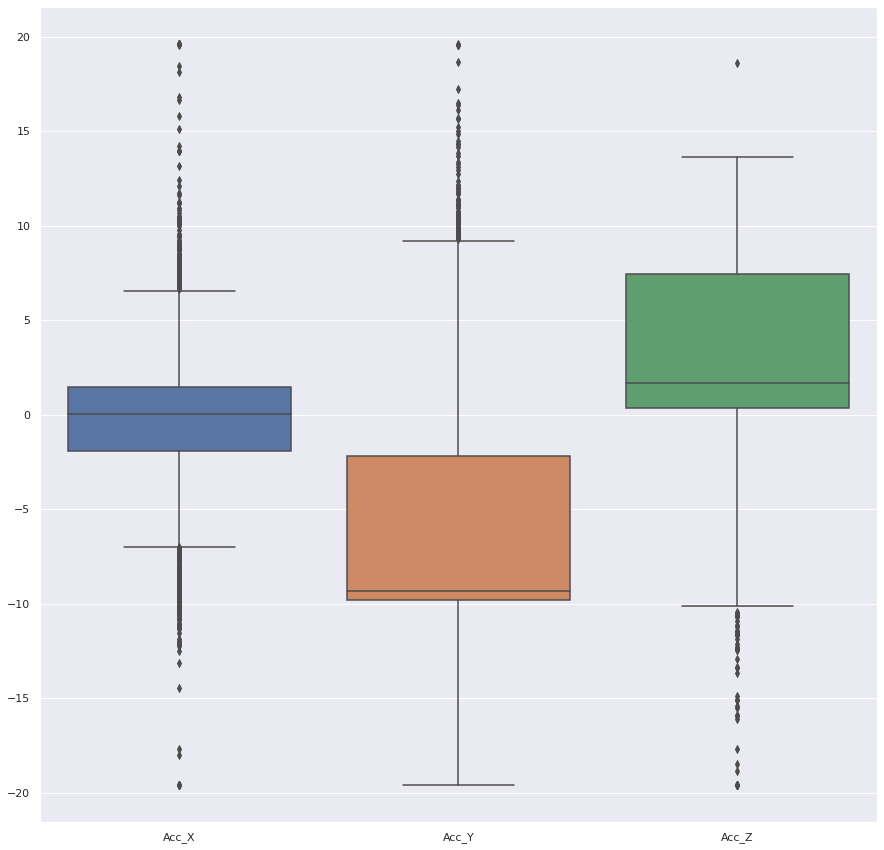

In [ ]:
#boxplot for data with outliers
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")
#df.head
#print(df.iloc[0,0:6])

In [ ]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class  first   last
0       1      0  26601
1       2   1200  26905
2       3   2741  27013
3       4   4478  27159
4       5   6177  27472
5       6   7709  27627
6       7   9399  28645
7       8  10226  29579
8       9  11137  30160
9      10  12401  31289
10     11  13117  32234
11     12  14017  32909
12     13  15187  33975
13     14  15966  17810
14     15  17811  35129
15     16  18502  35363
16     17  20113  35412
17     18  21909  35943
18     19  23223  36255
19     20  24756  36899


### Detecting and replacing outliers by mean

In [ ]:
#detecting and replacing outliers by mean
for m in range(1,21):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        Avg= np.mean(A.iloc[:,i])
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                #print(newdf.iloc[ami,i])
                df.iloc[ami,i] = Avg
                #print(Avg)
                #print(newdf.iloc[ami,i])
                f=f+1
                #C= A.replace(((A.iloc[ami,i] < (Q1 - 1.5 * IQR)) |(A.iloc[:,i] > (Q3 + 1.5 * IQR))), Avg)
        print(f)
    if(p<19):
        p=p+1

(1845, 4)
0
26601
14056
25019
(1845, 4)
1200
26905
25747
25748
(1845, 4)
2741
27013
27518
28006
(1845, 4)
4478
27159
36635
57275
(1845, 4)
6177
27472
69942
70850
(1845, 4)
7709
27627
78102
78896
(1845, 4)
9399
28645
79147
79445
(1845, 4)
10226
29579
79445
79733
(1845, 4)
11137
30160
81314
84616
(1845, 4)
12401
31289
84782
84914
(1845, 4)
13117
32234
84914
85705
(1845, 4)
14017
32909
99886
105576
(1845, 4)
15187
33975
105576
105576
(1845, 4)
15966
17810
105576
105576
(1845, 4)
17811
35129
105576
106834
(1845, 4)
18502
35363
111759
120150
(1845, 4)
20113
35412
125124
133564
(1845, 4)
21909
35943
134093
134340
(1845, 4)
23223
36255
139665
148948
(1845, 4)
24756
36899
149540
149565


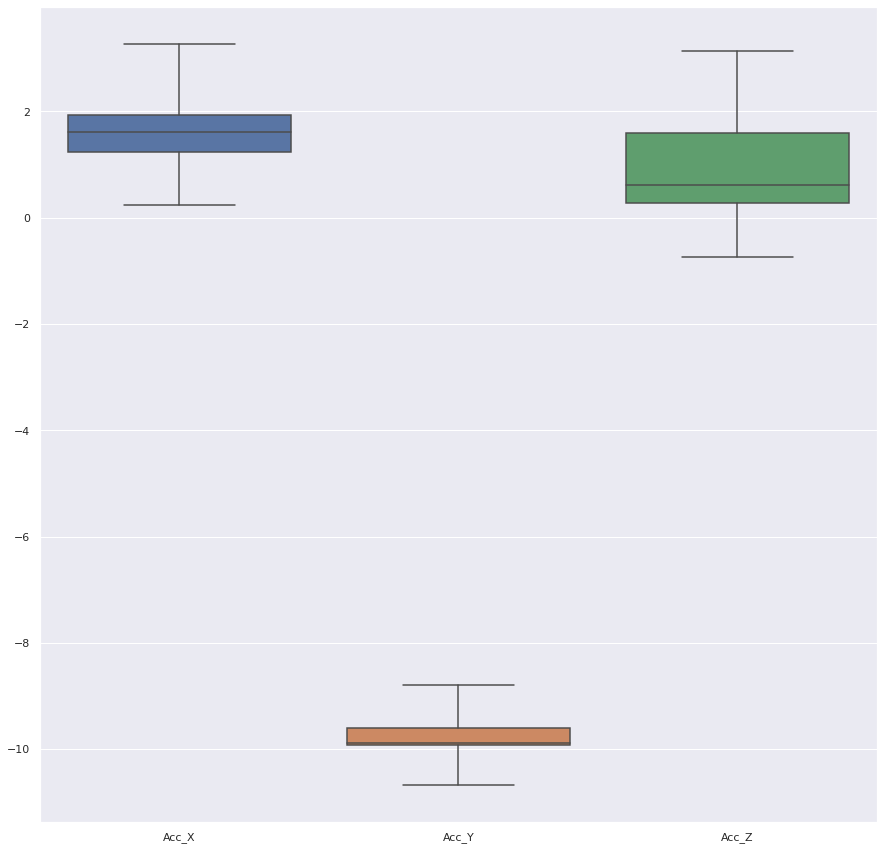

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers.png")

In [ ]:
#save the datset without outlier
df.to_csv('withoutoutlier.csv')

#  Apply Butterworth Filter

In [ ]:
#defining function for low pass filter
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y

In [ ]:
#filtering data with low pass filter
for m in range(1,21):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)

(1845, 4)
24756
36899
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
(1845, 4)
24756
36899
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.5601

In [ ]:
df.describe()

,Acc_X,Acc_Y,Acc_Z,Class
count,36900.000000,36900.000000,36900.000000,36900.000000
mean,1.332527,-9.475795,2.757905,10.500000
std,0.345063,1.315339,3.771881,5.766359
min,-0.005683,-12.453623,-19.608511,1.000000
25%,1.144176,-9.873352,0.359806,5.750000
50%,1.173022,-9.873352,1.620969,10.500000
75%,1.452261,-9.011562,6.908839,15.250000
max,3.266618,7.568761,18.631678,20.000000


In [ ]:
#save the datset without outlier
df.to_csv('filtered_data.csv')

In [ ]:
#taking filtered data into new dataframe
B=df

#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [ ]:
X,y

(          Acc_X     Acc_Y     Acc_Z
 0      2.660984 -9.653030  0.470237
 1      2.223091 -9.681017  2.223091
 2      2.098372 -9.481953  0.926070
 3      2.716461 -9.739352  0.912008
 4      2.288388 -9.371498  0.910390
 ...         ...       ...       ...
 36895  0.246348 -0.162557 -1.580772
 36896  0.219115  0.339492 -2.271675
 36897  0.201834  0.861736  1.789380
 36898  0.198877  1.291748 -4.627592
 36899  0.210980  1.534047  1.523002
 
 [36900 rows x 3 columns], 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 36895    20
 36896    20
 36897    20
 36898    20
 36899    20
 Name: Class, Length: 36900, dtype: int64)

# Encoding

In [ ]:
#one hot encoder for target column
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = np_utils.to_categorical(encoded_Y)

# defining properties for LSTM

In [ ]:
#defining properties for LSTM
N_TIME_STEPS = 1
N_FEATURES = 3
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs]) # acczs,
    labels.append(label)
    
#print("SEGMENTS: ",segments)
#print("LABELS: ",labels)
print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)
#pd.get_dummies(labels)  

SEGMENTS SHAPE:  (36899, 3, 1)
LABELS SHAPE:  (36899,)


In [ ]:
#shaping data into 3d
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int64)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (36899, 1, 3)
LABELS:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
x_train_f = pd.DataFrame.from_records(X_train)



```
# This is formatted as code
```

# Generate synthetic data Complete

In [ ]:
dfn = pd.read_csv("Final_Thesis_data.csv")
dfn.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
dfn = dfn.drop('Hr', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#dropping target column
X = dfn.drop('Class', axis=1)  
#taking target column
y = dfn['Class']
#df.head


In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20765, 3) (5192, 3) (20765,) (5192,)


In [ ]:
X_train

,Acc_X,Acc_Y,Acc_Z
3959,1.381420,-9.609592,1.670558
3120,0.982794,-9.994711,1.269999
1337,2.277844,-9.893566,0.604144
19660,-6.027760,2.344517,7.431120
13315,-2.035724,-9.345648,2.049498
...,...,...,...
10033,2.152643,-10.269879,0.813128
2532,1.498444,-9.977983,0.962574
24371,8.052897,-1.620874,-4.802769
4390,1.453366,-10.115497,0.277995


In [ ]:
y_train

3959      3
3120      3
1337      2
19660    16
13315    11
         ..
10033     7
2532      2
24371    19
4390      3
19700    16
Name: Class, Length: 20765, dtype: int64

In [ ]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_test)

In [ ]:
from tabgan.sampler import GANGenerator

new_X, new_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.001, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 100,}).generate_data_pipe(X_train, y_train,
                                                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
           

Fitting CTGAN transformers for each column:   0%|          | 0/4 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print(new_X.shape)
print(new_y.shape)

(52679, 3)
(52679,)


In [ ]:
new_X

,Acc_X,Acc_Y,Acc_Z
0,1.533801,-9.870922,5.409079
1,-0.169480,-10.433447,6.957382
2,-0.097775,-9.755437,6.675063
3,3.099341,-9.971825,5.606155
4,1.008388,-11.125423,8.530288
...,...,...,...
52674,1.426844,-9.672765,2.351608
52675,0.286000,-9.934650,1.579180
52676,0.852002,-9.895819,0.398263
52677,2.609971,-9.583934,0.385951


In [ ]:
new_y

0        22
1        11
2         9
3        12
4        15
         ..
52674     2
52675     9
52676     5
52677     5
52678    17
Name: Class, Length: 52679, dtype: int64

In [ ]:
new_y.unique()

array([22, 11,  9, 12, 15,  0, 16, 13, 17,  5, 21,  4, 19, -1,  2,  7, 14,
       20,  8,  1,  6, 10, 18,  3])

In [ ]:
generated_df = pd.concat([new_X,new_y],axis=1, join='inner')
generated_df

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Unnamed: 0,Class
0,0,9.556558,-9.222850,4.827902,0,14
1,1,6.318158,-9.062034,7.952014,1,7
2,2,6.775466,-9.055335,6.759527,2,16
3,3,6.150499,-12.006813,5.038735,3,13
4,4,7.132137,-9.041990,8.651838,4,16
...,...,...,...,...,...,...
54319,54319,2.362746,-9.458422,0.746228,54319,1
54320,54320,-0.718858,-9.248876,3.212232,54320,9
54321,54321,1.192453,-10.183977,0.279459,54321,1
54322,54322,0.058293,-9.904835,0.097371,54322,2


In [ ]:
generated_df = generated_df.drop("Unnamed: 0", axis=1)
generated_df

,Acc_X,Acc_Y,Acc_Z,Class
0,9.556558,-9.222850,4.827902,14
1,6.318158,-9.062034,7.952014,7
2,6.775466,-9.055335,6.759527,16
3,6.150499,-12.006813,5.038735,13
4,7.132137,-9.041990,8.651838,16
...,...,...,...,...
54319,2.362746,-9.458422,0.746228,1
54320,-0.718858,-9.248876,3.212232,9
54321,1.192453,-10.183977,0.279459,1
54322,0.058293,-9.904835,0.097371,2


In [ ]:
gan_csv =generated_df.to_csv("Generate_new_df.csv")

In [ ]:
df = pd.read_csv("Final_Thesis_data.csv")
df.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
df = df.drop('Hr', axis=1)  
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
final_df = df.append(generated_df)
final_df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
54319,2.362746,-9.458422,0.746228,1
54320,-0.718858,-9.248876,3.212232,9
54321,1.192453,-10.183977,0.279459,1
54322,0.058293,-9.904835,0.097371,2


In [ ]:
final_df.to_csv("merged.csv")

In [ ]:
new_y = new_y.to_frame().T
new_y = new_y.T

In [ ]:
X_train_com = np.concatenate((X_train, new_X))
y_train_com = np.concatenate((y_train, new_y))

#  LSTM Model

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 42   

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)
print("LENGTH X: ",len(X_train))
print("LENGTH Y: ",len(X_test))
print(X_train)

LENGTH X:  20764
LENGTH Y:  5192
[[[ 1.2915223 -9.876653  -4.7626657]]

 [[ 2.344738  -9.643455   1.707473 ]]

 [[ 1.2915223 -9.876653   7.933313 ]]

 ...

 [[ 1.59223   -9.797394   0.694684 ]]

 [[ 1.2915223 -9.876653   9.665562 ]]

 [[ 1.2915223 -9.876653   5.4563856]]]


In [ ]:
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 500       
batch_size = 256   
learning_rate = 0.00015
l2_loss = 0.0015

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout

In [ ]:
# Initialising the LSTM
classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 128, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))
classifier.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 64, return_sequences = True, activation='relu'))
#classifier.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 32, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 20, activation='softmax'))

# Compiling the LSTM
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Saving Best Model Only

check_point = tf.keras.callbacks.ModelCheckpoint('Best_model.h5', monitor='accuracy', save_best_only=True)

In [ ]:
history = classifier.fit(X_train, y_train, epochs = 500, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/500
65/65 [==============================] - 10s 49ms/step - loss: 0.4751 - accuracy: 0.0685 - val_loss: 0.2368 - val_accuracy: 0.0684
Epoch 2/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2108 - accuracy: 0.0651 - val_loss: 0.1984 - val_accuracy: 0.0684
Epoch 3/500
65/65 [==============================] - 2s 38ms/step - loss: 0.1965 - accuracy: 0.0934 - val_loss: 0.1958 - val_accuracy: 0.0966
Epoch 4/500
65/65 [==============================] - 2s 29ms/step - loss: 0.1952 - accuracy: 0.0981 - val_loss: 0.1950 - val_accuracy: 0.1009
Epoch 5/500
65/65 [==============================] - 2s 29ms/step - loss: 0.1943 - accuracy: 0.1028 - val_loss: 0.1943 - val_accuracy: 0.1031
Epoch 6/500
65/65 [==============================] - 2s 28ms/step - loss: 0.1936 - accuracy: 0.1080 - val_loss: 0.1935 - val_accuracy: 0.1033
Epoch 7/500
65/65 [==============================] - 2s 29ms/step - loss: 0.1930 - accuracy: 0.1175 - val_loss: 0.1925 - val_accuracy: 0.1230
Epoch

# Hyperperameter Optimization using Keras Tuner

In [ ]:
#taking filtered data into new dataframe
B=df

#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 42   

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)
print("LENGTH X: ",len(X_train))
print("LENGTH Y: ",len(X_test))

LENGTH X:  20764
LENGTH Y:  5192


In [ ]:
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.20)
print("LENGTH X: ",len(X_train))
print("LENGTH Y: ",len(X_test))

LENGTH X:  29519
LENGTH Y:  7380


#  LSTM with keras tuner

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()

    hp_units1 = hp.Int('units1', min_value=32, max_value=1024, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=1024, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=1024, step=32)
    hp_units4 = hp.Int('units4', min_value=32, max_value=1024, step=32)
    hp_units5 = hp.Int('units5', min_value=32, max_value=1024, step=32)
    #hp_units6 = hp.Int('units6', min_value=32, max_value=1024, step=32)
    
    hp_activation = hp.Choice('activations', values=['relu', 'tanh'])
    hp_dropout1 = hp.Choice('dropout_rate1', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8])
    hp_dropout2 = hp.Choice('dropout_rate2', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8])
    #hp_dropout3 = hp.Choice('dropout_rate3', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8])

    model.add(LSTM(units = hp_units1, return_sequences = True, activation=hp_activation))
    model.add(LSTM(units = hp_units2, return_sequences = True, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout1))
    model.add(LSTM(units = hp_units3, return_sequences = True, activation=hp_activation))
    model.add(LSTM(units = hp_units4, return_sequences = True, activation=hp_activation))
    model.add(LSTM(units = hp_units5, activation=hp_activation))
    model.add(Dense(units = 20, activation='softmax'))
  
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(
    build_model,
    objective = 'val_accuracy',
    max_epochs=50,
    #ax_trials=20,
    overwrite=True,
    directory = 'Thesis_project_dir',
    project_name = 'intensity_hypermodel'
)

In [ ]:
# HyperBand algorithm from keras tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective = 'val_accuracy',
    max_trials = 50,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    hyperparameters=None,
    directory = 'Thesis_project_dir',
    project_name = 'intensity_hypermodel'
)

In [ ]:
X_train.shape ,y_train.shape

((29519, 1, 3), (29519, 20))

In [ ]:
X_test.shape ,y_test.shape

((7380, 1, 3), (7380, 20))

In [ ]:
# Our vectorized labels
Y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
Y_train.shape ,Y_test.shape
new_y = new_y.to_frame().T
new_y = new_y.T

When calling the tuner’s search method the Hyperband algorithm starts working and the results are stored in that instance.

In [ ]:
tuner.search(X_train, y_train, epochs=300, validation_data=(X_test,y_test))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
512               |?                 |units1
672               |?                 |units2
224               |?                 |units3
992               |?                 |units4
352               |?                 |units5
relu              |?                 |activations
0.4               |?                 |dropout_rate1
0.7               |?                 |dropout_rate2
0.01              |?                 |learning_rate

Epoch 1/300
923/923 [==============================] - 143s 146ms/step - loss: 0.1631 - accuracy: 0.2015 - val_loss: 0.1486 - val_accuracy: 0.2619
Epoch 2/300
923/923 [==============================] - 131s 142ms/step - loss: 0.1796 - accuracy: 0.2566 - val_loss: 0.1503 - val_accuracy: 0.2423
Epoch 3/300
923/923 [==============================] - 131s 142ms/step - loss: 0.1318 - accuracy: 0.3566 - val_loss: 0.1322 - val_accuracy: 0.3668
Epoch 4/300
923/923 [==========================

In [ ]:
for param in [f"units{i}" for i in range(1,7)] + ['learning_rate'] + ['activations'] + [f"dropout_rate{i}" for i in range(1,4)]:
  print(param, tuner.get_best_hyperparameters()[0].get(param))

units1 128
units2 64
units3 384
units4 256
units5 320
units6 928
learning_rate 0.001
activations tanh
dropout_rate1 0.2
dropout_rate2 0.1
dropout_rate3 0.2


In [ ]:
hp_model = tuner.get_best_models()[0]
hp_model.build(X_train.shape)
hp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (20764, 1, 128)           67584     
                                                                 
 lstm_1 (LSTM)               (20764, 1, 64)            49408     
                                                                 
 dropout (Dropout)           (20764, 1, 64)            0         
                                                                 
 lstm_2 (LSTM)               (20764, 1, 384)           689664    
                                                                 
 lstm_3 (LSTM)               (20764, 1, 256)           656384    
                                                                 
 lstm_4 (LSTM)               (20764, 320)              738560    
                                                                 
 dense (Dense)               (20764, 20)               6

In [ ]:
hp_model.fit(
    X_train, 
    y_train,
    epochs = 200,
    batch_size = 140
)

Epoch 1/200
149/149 [==============================] - 11s 73ms/step - loss: 0.0873 - accuracy: 0.5777
Epoch 2/200
149/149 [==============================] - 10s 70ms/step - loss: 0.0877 - accuracy: 0.5754
Epoch 3/200
149/149 [==============================] - 10s 70ms/step - loss: 0.0868 - accuracy: 0.5801
Epoch 4/200
149/149 [==============================] - 11s 77ms/step - loss: 0.0862 - accuracy: 0.5838
Epoch 5/200
149/149 [==============================] - 10s 70ms/step - loss: 0.0854 - accuracy: 0.5845
Epoch 6/200
149/149 [==============================] - 11s 71ms/step - loss: 0.0887 - accuracy: 0.5741
Epoch 7/200
110/149 [=====================>........] - ETA: 2s - loss: 0.0860 - accuracy: 0.5855

KeyboardInterrupt: ignored

In [ ]:
hp_model.evaluate(X_test, y_test)

163/163 [==============================] - 11s 52ms/step - loss: 0.0883 - accuracy: 0.5836


[0.08829884231090546, 0.5835901498794556]

In [ ]:
loss, accuracy = hp_model.evaluate(X_test, y_test, batch_size = 256, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

21/21 [==============================] - 4s 197ms/step - loss: 0.0883 - accuracy: 0.5836
Test Accuracy : 0.5835901498794556
Test Loss : 0.08829885721206665


# New section

In [ ]:
model = Sequential()
model.add(Dense(units = 224, activation = "relu", input_dim = 20)
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(units = 32, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 16, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1, activation = "relu"))

In [ ]:
for param in [f"units{i}" for i in range(1,6)] + ['learning_rate'] + ['activations'] + [f"dropout_rate{i}" for i in range(1,3)]:
  print(param, tuner.get_best_hyperparameters()[0].get(param))

units1 608
units2 640
units3 832
units4 992
units5 832
learning_rate 0.001
activations relu
dropout_rate1 0.7
dropout_rate2 0.4


In [ ]:
hp_model = tuner.get_best_models()[0]
hp_model.build(X_train.shape)
hp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (20764, 1, 608)           1488384   
                                                                 
 lstm_1 (LSTM)               (20764, 1, 640)           3197440   
                                                                 
 dropout (Dropout)           (20764, 1, 640)           0         
                                                                 
 lstm_2 (LSTM)               (20764, 1, 832)           4902144   
                                                                 
 lstm_3 (LSTM)               (20764, 1, 992)           7241600   
                                                                 
 lstm_4 (LSTM)               (20764, 832)              6073600   
                                                                 
 dense (Dense)               (20764, 20)               1

In [ ]:
hp_model.fit(
    X_train, 
    y_train,
    epochs = 200,
    batch_size = 256
)

Epoch 1/200
82/82 [==============================] - 62s 749ms/step - loss: 0.0869 - accuracy: 0.5824
Epoch 2/200
82/82 [==============================] - 57s 697ms/step - loss: 0.0856 - accuracy: 0.5900
Epoch 3/200
82/82 [==============================] - 57s 697ms/step - loss: 0.0860 - accuracy: 0.5920
Epoch 4/200
82/82 [==============================] - 57s 698ms/step - loss: 0.0856 - accuracy: 0.5928
Epoch 5/200
82/82 [==============================] - 57s 696ms/step - loss: 0.0863 - accuracy: 0.5850
Epoch 6/200
82/82 [==============================] - 58s 706ms/step - loss: 0.0850 - accuracy: 0.5920
Epoch 7/200
82/82 [==============================] - 57s 700ms/step - loss: 0.0865 - accuracy: 0.5903
Epoch 8/200
82/82 [==============================] - 57s 699ms/step - loss: 0.0889 - accuracy: 0.5794
Epoch 9/200
82/82 [==============================] - 57s 699ms/step - loss: 0.0920 - accuracy: 0.5679
Epoch 10/200
82/82 [==============================] - 58s 703ms/step - loss: 0.087

KeyboardInterrupt: ignored